2011-2014 data for analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime

import pandas as pd
import netCDF4 as nc
import datetime
import pandas as pd
#import seaborn as sns tell me import error!!
from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools, nc_tools, tidetools
from glob import glob
%matplotlib inline

In [2]:
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '25'}
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '30', 'color': 'black',
    'weight': 'medium'
}

In [3]:
import ACTDR

In [4]:
a = ACTDR.load_dat('SOG_nancy_mod.dat')

> open  SOG_nancy_mod.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_nancy_mod.dat
> complete


In [5]:
len(ACTDR.CTD_DAT)

1529

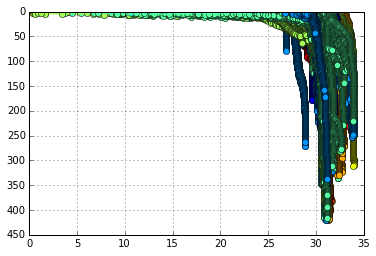

In [6]:
cmap=cm.get_cmap('jet',12)
count=0
for cast in ACTDR.CTD_DAT:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,450,0])
plt.grid()

In [7]:
bathyy, X, Y = tidetools.get_SS2_bathy_data()

In [8]:
def select_cast_cSog(flag, imin, imax, jmin, jmax):
    """This function was made to select 
        the cast in the different SoG region in 
        different month
        1)in all the years if flag = 1
        2)only in year 2014 if flag = 2
        3)only except year 2014 if flag = 3"""
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin):
                s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin) & \
            (cast['Year'] == 2014):
                s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin) & \
            (cast['Year'] < 2014):
                s_cast.append(cast)
        
    return s_cast

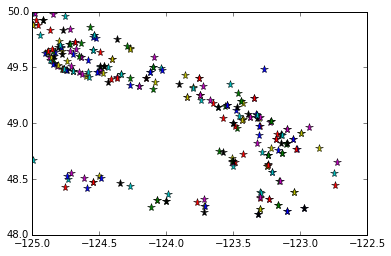

In [9]:
casts = []
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    if year > 2013:
        plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)

# General statistical view of data in central Sog

In [10]:
## Select central SoG data
sog_data = select_cast_cSog(1,240, 350, 390, 450)

In [11]:
sog = pd.DataFrame(sog_data)

In [12]:
max_year = sog['Year'].max()
max_year

2014

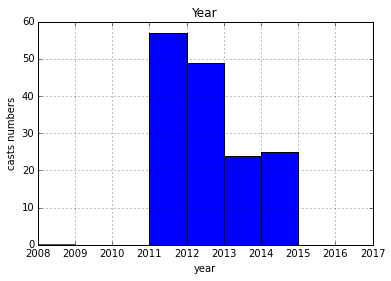

In [13]:
max_year = sog['Year'].max()
min_year = sog['Year'].min()
sog.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

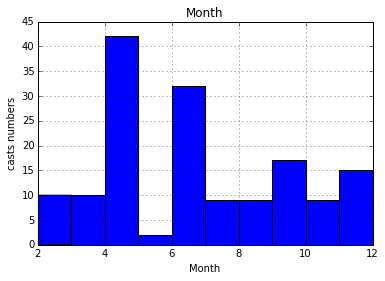

In [14]:
sog.hist('Month')
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

In [15]:
def select_cast_month_more(flag, imin, imax, jmin, jmax, Month):
    """This function was made to select 
        the cast in the SoG region in the
        specific month """
    
    s_cast = []
    if flag ==1:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & (cast['Month'] == Month):
                s_cast.append(cast)
    if flag ==2:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & \
            (cast['Year'] == 2014) & (cast['Month'] == Month):
                s_cast.append(cast)
    if flag ==3:
        for cast in ACTDR.CTD_DAT:
            [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
            cast['Latitude'],X,Y,bathyy)
            if (x1 < jmax) & (x1 > jmin) & (y1 < imax) & (y1 > imin)  & \
            (cast['Year'] < 2014) & (cast['Month'] == Month):
                s_cast.append(cast)
    return s_cast

In [16]:
def select_cast_contimonth(s_cast, Month):
    """This function was made continuously with function select_cast_
        cSog()to select month based on that"""
    ss_cast = []
    for cast in s_cast:
        if cast['Month'] == Month:
            ss_cast.append(cast)
    return ss_cast

In [17]:
def results_dataset(period, grid, results_dir):
    """Return the results dataset for period (e.g. 1h or 1d)
    and grid (e.g. grid_T, grid_U) from results_dir.
    """
    filename_pattern = 'SalishSea_{period}_*_{grid}.nc'
    filepaths = glob(os.path.join(results_dir, filename_pattern.format(period=period, grid=grid)))
    return nc.Dataset(filepaths[0])

In [18]:
def compare_cast_SoG_zoomin(flag, imin,imax,jmin,jmax,Month,num):
    month = {'1':{'name': 'Jan'},'2':{'name': 'Feb'},\
    '3':{'name': 'Mar'}, '4':{'name': 'Apr'},'5':{'name': 'May'},\
    '6':{'name': 'Jun'},'7':{'name': 'Jul'},'8':{'name': 'Aug'},\
    '9':{'name': 'Sep'}, '10':{'name': 'Oct'}, '11':{'name': 'Nov'},\
    '12':{'name': 'Dec'}}
    results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
    fig,axs=plt.subplots(1,4,figsize=(50,15))
    #map
    ax=axs[0]
    grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    lons = grid.variables['nav_lon']
    lats = grid.variables['nav_lat']
    #s_cast = select_cast_cSog(flag, imin, imax, jmin, jmax)
    s_cast = select_cast_month_more(flag, imin, imax, jmin, jmax, Month)
    for cast in s_cast:
        sites, =ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='.', label = 'sites')
        ax.legend([sites],['sites'],loc = 1, fontsize = 25)

    viz_tools.plot_coastline(ax, grid, coords = 'map')
    ax.plot(lons[jmin, imin:imax,],lats[jmin, imin:imax],'r-')
    ax.plot(lons[jmax, imin:imax,],lats[jmax, imin:imax,],'r-')
    ax.plot(lons[ jmin:jmax, imin],lats[jmin:jmax, imin],'r-')
    ax.plot(lons[jmin:jmax, imax],lats[jmin:jmax, imax],'r-')    
    ax.set_xlim([-125.5,-122])
    ax.set_ylim([48.5,50.5])
    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    ax.set_xlabel('Longitude', **axis_font)
    ax.set_ylabel('Latitude', **axis_font)    
    count = 0
    ##prepare nowcasts results
    for cast in s_cast:
        if Month >= 10:
            run_date = datetime.datetime(2014, Month,cast['Day'])
        else:
            run_date = datetime.datetime(2015, Month,cast['Day'])
        # Results dataset location
        results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
        grid_T_hr = results_dataset('1d', 'grid_T', results_dir)
        sal_hr = grid_T_hr.variables['vosaline']
        depth = grid_T_hr.variables['deptht']
        bathyy, X, Y = tidetools.get_SS2_bathy_data()
        [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
        cast['Latitude'],X,Y,bathyy)
        sal_hr = np.ma.masked_values(sal_hr[0,:,x1,y1], 0)
        ax = axs[1]
        modd, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        ##profile comparison          
        obss, =ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen',marker='o')
        count=count+1
        ax.axis([0,35,400,0])
        ax.grid('on')   
        ax.set_title('Comparison in '+ str(month[num]['name']), **title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.legend([modd,obss],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[2]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o')
        ax.set_xlim(0, 35)
        ax.set_ylim(80, 0)
        ax.set_title('Zoom in top 80m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[3]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*')
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o')
        ax.set_xlim(0, 35)
        ax.set_ylim(20, 0)
        ax.set_title('Zoom in top 20m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
              
    return fig

In [19]:
def compare_cast_SoG_zoomin_more(sog,Month, flag, imin,imax,jmin,jmax,num):
    """This function was made to compare climatology observed data
        with model results, zoom in top 20 m ultimately, with max, min
        mean of observed & modelled surface salinity displaying"""
    
    month = {'1':{'name': 'Jan'},'2':{'name': 'Feb'},\
    '3':{'name': 'Mar'}, '4':{'name': 'Apr'},'5':{'name': 'May'},\
    '6':{'name': 'Jun'},'7':{'name': 'Jul'},'8':{'name': 'Aug'},\
    '9':{'name': 'Sep'}, '10':{'name': 'Oct'}, '11':{'name': 'Nov'},\
    '12':{'name': 'Dec'}}
    max_obs_surface = []
    min_obs_surface = []
    max_mod_surface = []
    min_mod_surface = []
    sog_month = sog[sog['Month']== Month]
    dep = sog_month['Depth']
    sal = sog_month['Salinity']
    if max(dep)[0] <5: ##surface depth maximum 5m
        max_obs_surface.append(max(sal)[0])
        min_obs_surface.append(min(sal)[0])
    results_home = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'
    fig,axs=plt.subplots(1,4,figsize=(60,20))
    #map
    ax=axs[0]
    grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
    lons = grid.variables['nav_lon']
    lats = grid.variables['nav_lat']
    #s_cast = select_cast_month_more(imin, imax, jmin, jmax,Month)
    s_cast = select_cast_cSog(flag, imin, imax, jmin, jmax)
    ss_cast = select_cast_contimonth(s_cast, Month)
    for cast in ss_cast:
        if Month != 3:
            sites, =ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='*',\
            markersize=20, label = 'sites')
            ax.legend([sites],['sites'],loc = 1, fontsize = 25)
        elif Month ==3:
            ax.plot(cast['Longitude'],cast['Latitude'],'DodgerBlue',marker='*', \
                    markersize=20, label = 'sites')
    viz_tools.plot_coastline(ax, grid, coords = 'map')
    ax.plot(lons[jmin, imin:imax,],lats[jmin, imin:imax],'r-')
    ax.plot(lons[jmax, imin:imax,],lats[jmax, imin:imax,],'r-')
    ax.plot(lons[jmin:jmax, imin],lats[jmin:jmax, imin],'r-')
    ax.plot(lons[jmin:jmax, imax],lats[jmin:jmax, imax],'r-')    
    ax.set_xlim([-124.,-122.8])
    ax.set_ylim([48.6,49.3])
    ax.set_xlabel('Longitude', **axis_font)
    ax.set_ylabel('Latitude', **axis_font)
    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    count = 0
    ##prepare nowcasts results
    for cast in ss_cast:
        if Month >= 10:
            run_date = datetime.datetime(2014, Month,cast['Day'])
        else:
            run_date = datetime.datetime(2015, Month,cast['Day'])
        # Results dataset location
        results_dir = os.path.join(results_home, run_date.strftime('%d%b%y').lower())
        grid_T_hr = results_dataset('1d', 'grid_T', results_dir)
        sal_hr = grid_T_hr.variables['vosaline']
        depth = grid_T_hr.variables['deptht']
        bathyy, X, Y = tidetools.get_SS2_bathy_data()
        [x1, y1] = tidetools.find_closest_model_point(cast['Longitude'] , \
        cast['Latitude'],X,Y,bathyy)
        sal_hr = np.ma.masked_values(sal_hr[0,:,x1,y1], 0)
        max_mod_surface.append(np.nanmax(sal_hr[2:4])) ##find max and min of 2.5-3.5m
        min_mod_surface.append(np.nanmin(sal_hr[2:4]))
        ax = axs[1]
        modd, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',\
                       markersize = 8, linewidth=5.0)
        ##profile comparison          
        obss, =ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen',marker='o',\
        markersize = 8, linewidth=5.0)
        count=count+1
        ax.axis([0,35,400,0])
        ax.grid('on')   
        ax.set_title('Comparison in '+ str(month[num]['name']), **title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.legend([modd,obss],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[2]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',markersize = 8, linewidth=5.0)
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o',\
                      markersize = 8, linewidth=5.0)
        ax.set_xlim(0, 35)
        ax.set_ylim(80, 0)
        ax.set_title('Zoom in top 80m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
        ax = axs[3]
        mod, = ax.plot(sal_hr, depth[:], 'MediumBlue',marker = '*',\
                      markersize = 8, linewidth=5.0)
        obs, = ax.plot(cast['Salinity'],cast['Depth'],'DarkGreen', marker='o',\
                      markersize = 8, linewidth=5.0)
        ax.set_xlim(0, 35)
        ax.set_ylim(20, 0)
        ax.set_title('Zoom in top 20m ',**title_font)
        plt.setp(ax.get_xticklabels(), fontsize=25)
        plt.setp(ax.get_yticklabels(), fontsize=25)
        ax.set_xlabel('salinity', **axis_font)
        ax.set_ylabel('depth [m]', **axis_font)
        ax.grid('on') 
        ax.legend([mod,obs],['mod','obs'],loc = 2, fontsize = 25)
    max_mod_max = np.nanmax(max_mod_surface)
    min_mod_min = np.nanmin(min_mod_surface)
    #axs[2].text( 0, 18,'Obs mean of surface {0:.4}'.format(max_obs_surface[0]),\
           #fontsize=35)
    #axs[2].text( 0, 18.5,'Mod mean of surface {0:.4}'.format(min_obs_surface[0]),\
           #fontsize=35)
    axs[3].text( 0, 18,'Obs max of surface {0:.4}'.format(max_obs_surface[0]),\
           fontsize=35)
    axs[3].text( 0, 18.5,'Obs min of surface {0:.4}'.format(min_obs_surface[0]),\
           fontsize=35)
    axs[3].text( 0, 19,'Mod max of surface {0:.4}'.format(max_mod_max),\
           fontsize=35)
    axs[3].text( 0, 19.5,'Mod min of surface {0:.4}'.format(min_mod_min),\
           fontsize=35)
                
    return fig

# Data group by month except year 2014

In [20]:
## flag = 3, exclude year 2014
sog_data = select_cast_cSog(3,240, 350, 390, 450)
sogg = pd.DataFrame(sog_data)

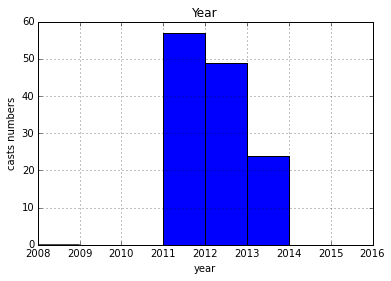

In [21]:
max_year = sogg['Year'].max()
min_year = sogg['Year'].min()
sogg.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

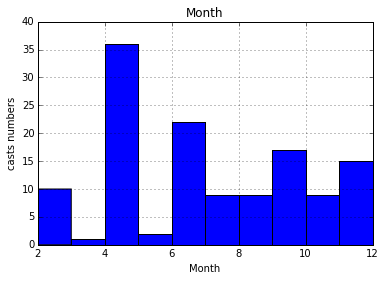

In [22]:
sogg.hist('Month')
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

IndexError: list index out of range

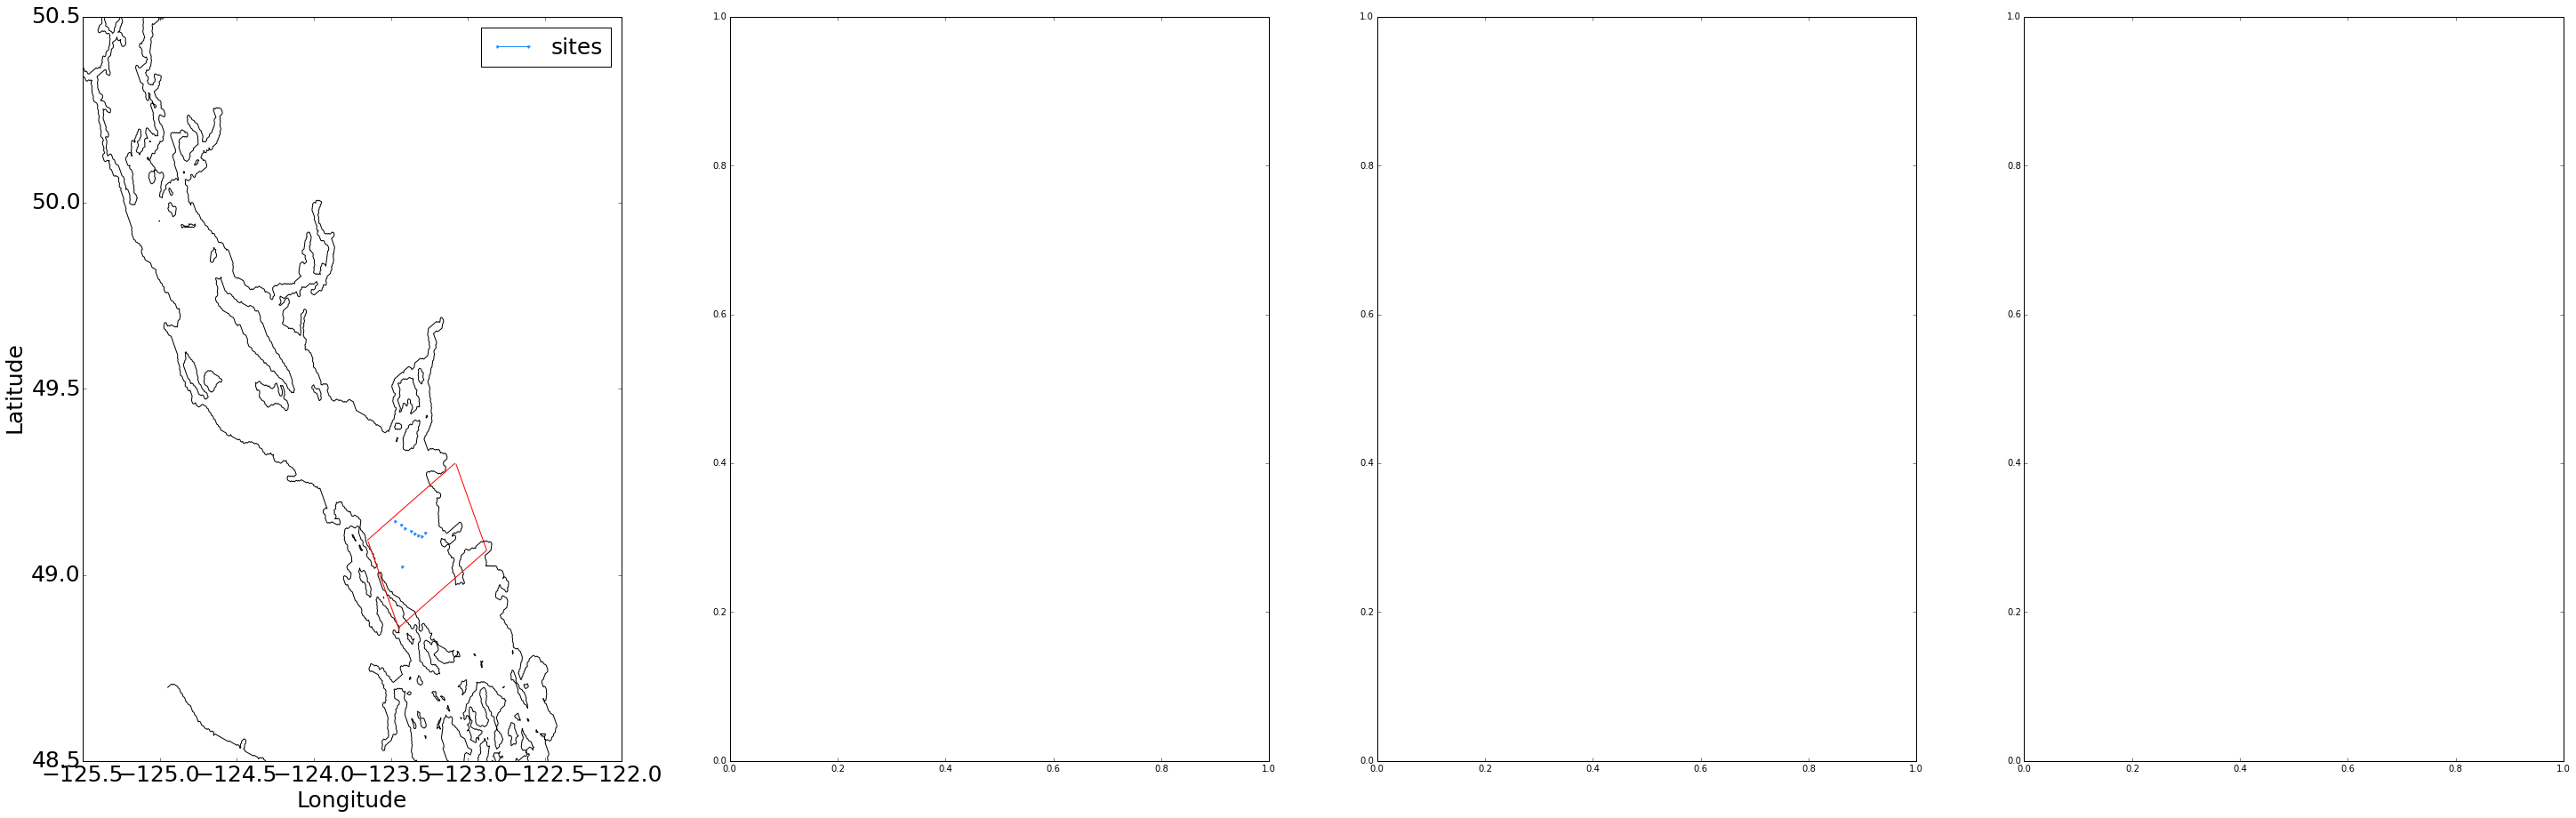

In [33]:
## For Oct, the day is 17 & 19 which are in early-days directory
fig = compare_cast_SoG_zoomin(3,240, 350, 390, 450, 10, '10')

In [25]:
s_cast = select_cast_cSog(3, 240, 350, 390, 440)
len(s_cast)
sog_month = sog[sog['Month']== 11]
sog_month

Day                                              Depth                 ID  \
48   25                     [2.47875406228, 2.47875406228]  20111125123294911   
49   25                     [2.67705492318, 2.67705492318]  20111125123304910   
50   25                     [2.77620375561, 2.77620375561]  20111125123334911   
51   25                     [2.97450122184, 2.97450122184]  20111125123354911   
52   25                      [2.9744995005, 3.07364873829]  20111125123374912   
53   25                     [2.87534881343, 2.87534881343]  20111125123404912   
54   25                       [2.7761975408, 2.7761975408]  20111125123424913   
55   25                     [2.87534307771, 2.87534307771]  20111125123484914   
56   25  [3.0736750972, 3.86687407014, 4.85836845742, 5...  20111125123434902   

     Latitude   Longitude  Month  \
48  49.111000 -123.285167     11   
49  49.103500 -123.300833     11   
50  49.106167 -123.326667     11   
51  49.111167 -123.350000     11   
52  49.117500 -123.373500     11   
53  49.122833 -123.397000     11   
54  49.130667 -123.419833     11   
55  49.144667 -123.477333     11   
56  49.023667 -123.430500     11   

                                             Salinity  \
48                                   [24.593, 19.388]   
49                                   [24.443, 25.502]   
50                                 [26.1029, 25.9584]   
51                                 [25.7122, 25.6983]   
52                                 [25.6215, 25.6287]   
53                                 [25.6148, 25.6206]   
54                                 [25.8669, 25.8643]   
55                                 [25.7051, 25.6493]   
56  [25.5933, 26.3083, 26.8018, 26.9477, 27.5281, ...   

                                          Temperature  Year  
48                                   [7.8174, 7.8354]  2011  
49                                   [7.6929, 7.6961]  2011  
50                                   [7.9641, 7.8046]  2011  
51                                   [7.7365, 7.7339]  2011  
52                                    [7.674, 7.6811]  2011  
53                                   [7.6197, 7.6201]  2011  
54                                   [7.7387, 7.7363]  2011  
55                                    [7.6658, 7.667]  2011  
56  [7.8221, 7.9857, 8.1244, 8.1773, 8.42, 8.6558,...  2011

In [64]:
ss_cast = select_cast_contimonth(s_cast, 11)
len(ss_cast)

7

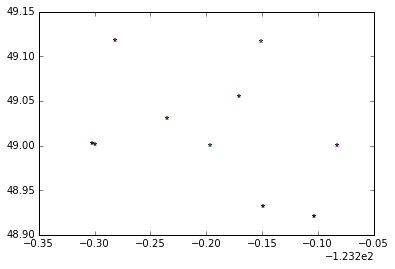

In [32]:
for i in s_cast:
    if i['Month'] == 2:
        plt.plot(i['Longitude'], i['Latitude'], '*', markersize = 4)

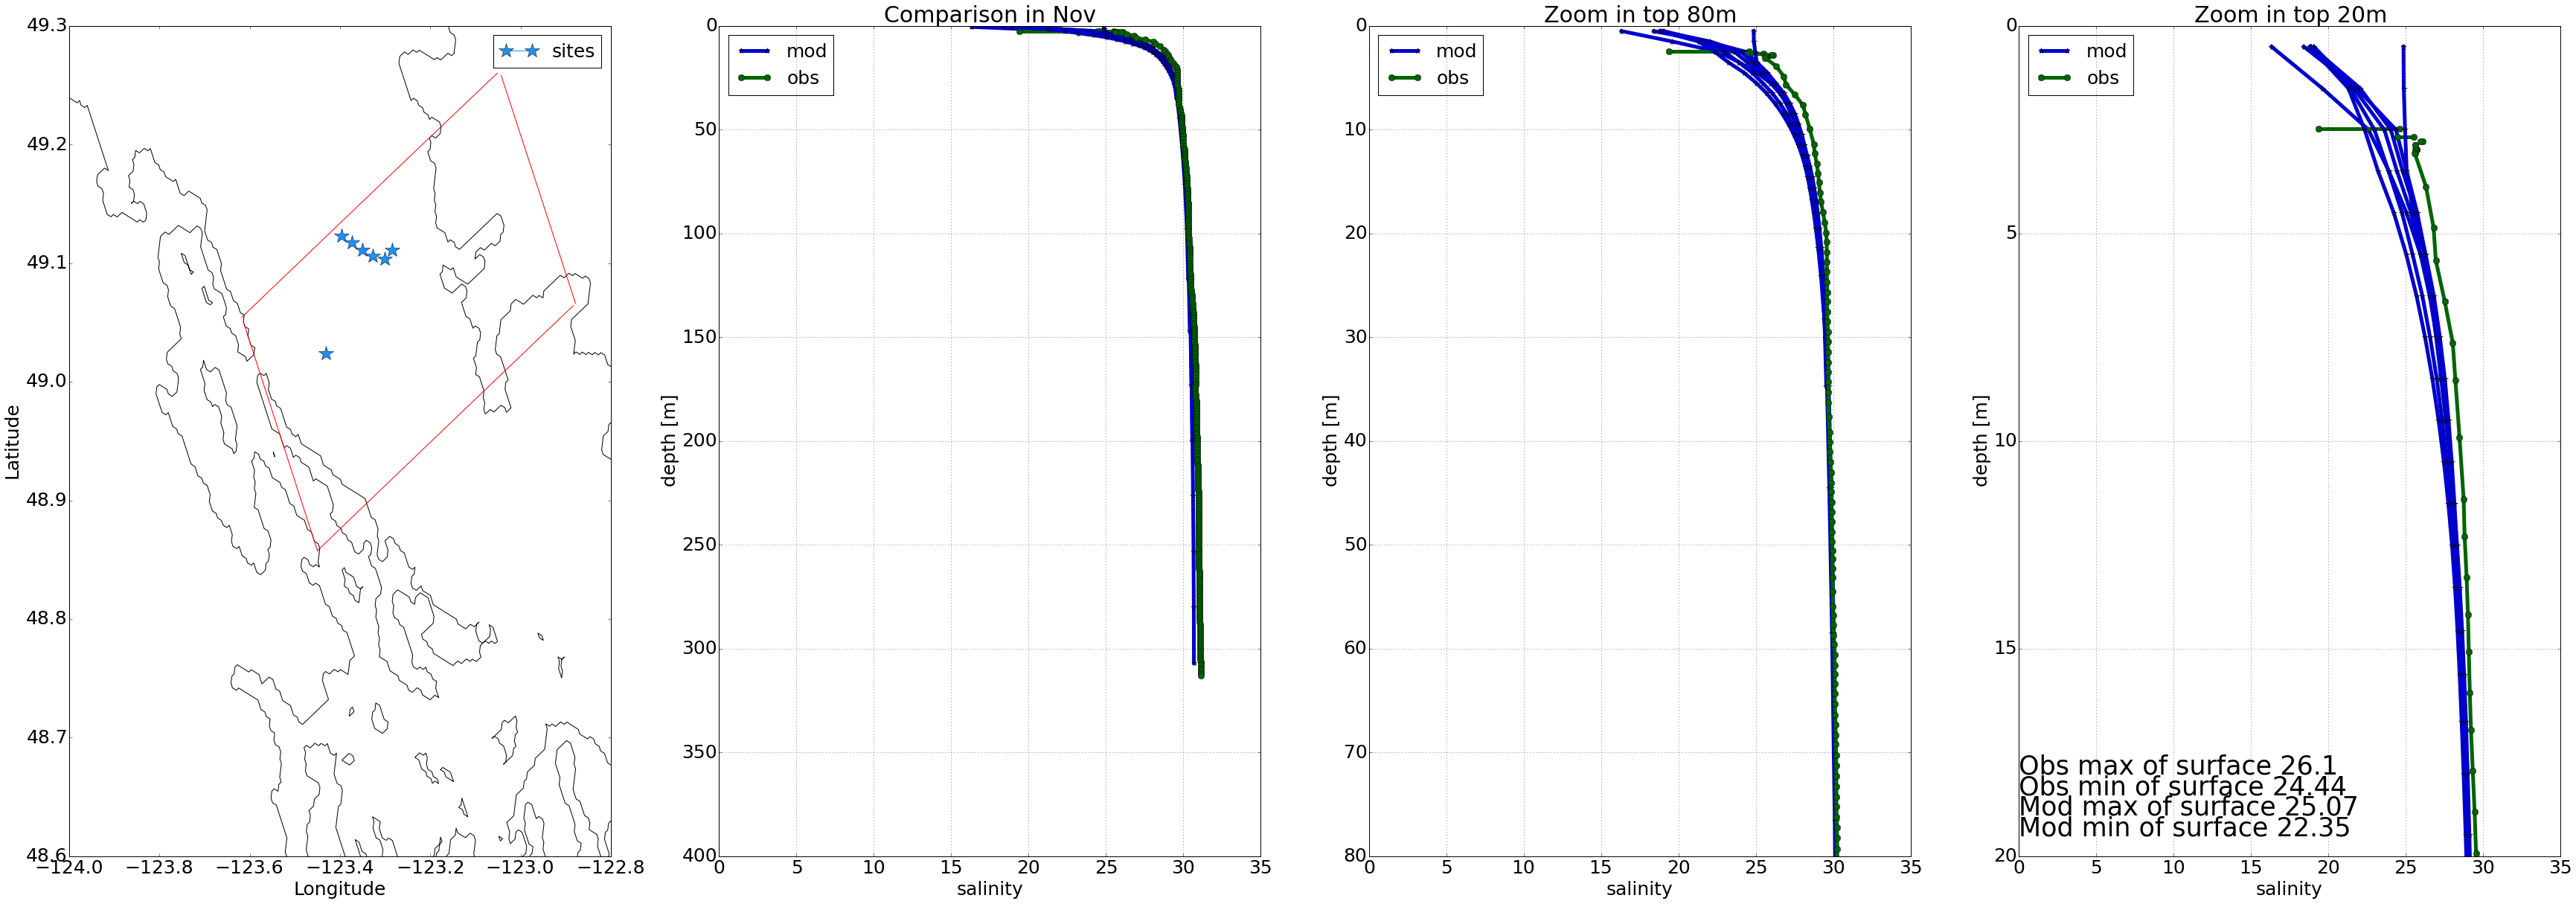

In [23]:
## Nov
fig = compare_cast_SoG_zoomin_more(sogg, 11,3, 240, 350, 390, 440, '11')

* Obs in Nov are all year 2011. Surface depths for obs are between[2.5m, 3.0m]. Our model is 2-3 psu fresher than obs within that depth. River discharge in 2011 in Nov ranges between[1200, 2000], discharge in 2014....see Mark's data 

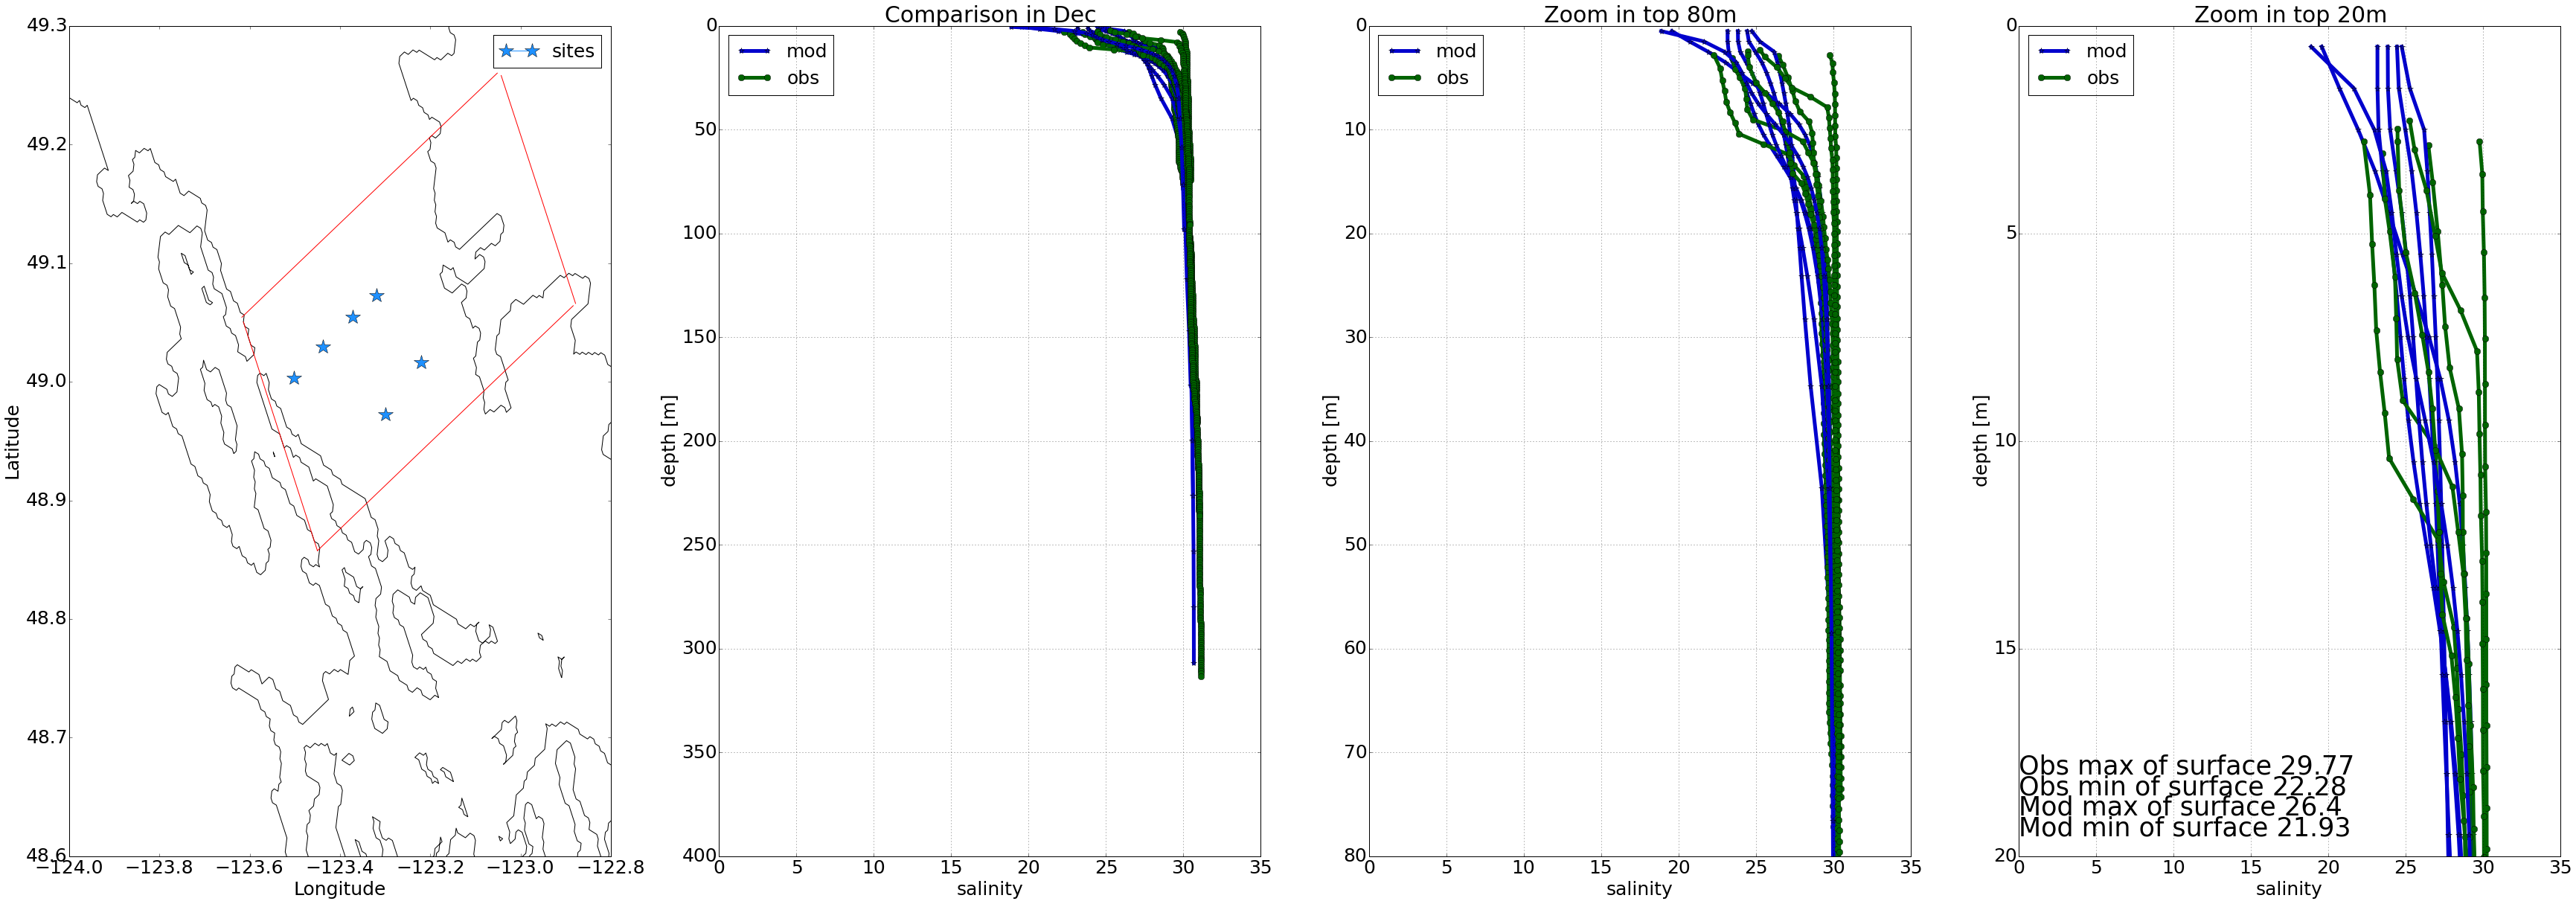

In [24]:
## Dec
fig = compare_cast_SoG_zoomin_more(sogg, 12, 3, 240, 350, 390, 440,'12')

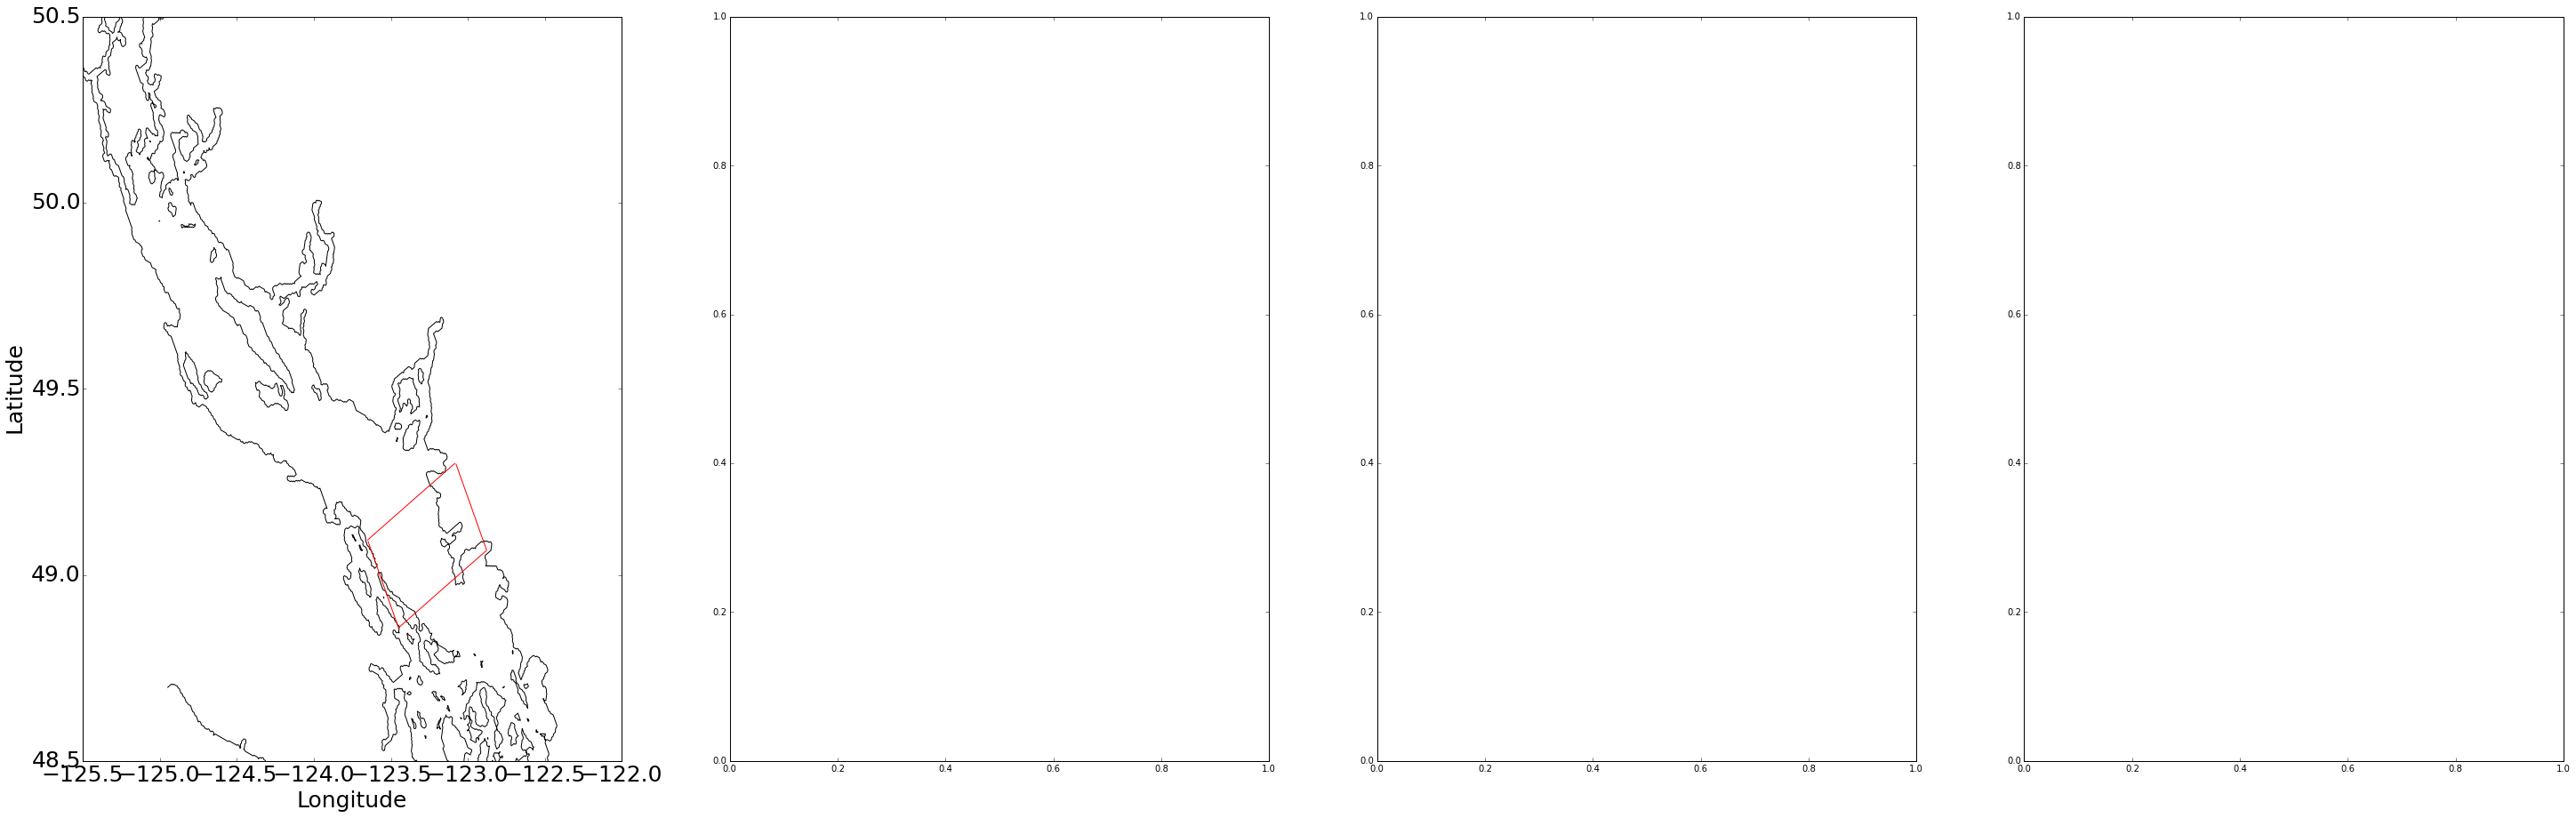

In [25]:
## Jan
fig = compare_cast_SoG_zoomin( 3,240, 350, 390, 450, 1,'1')

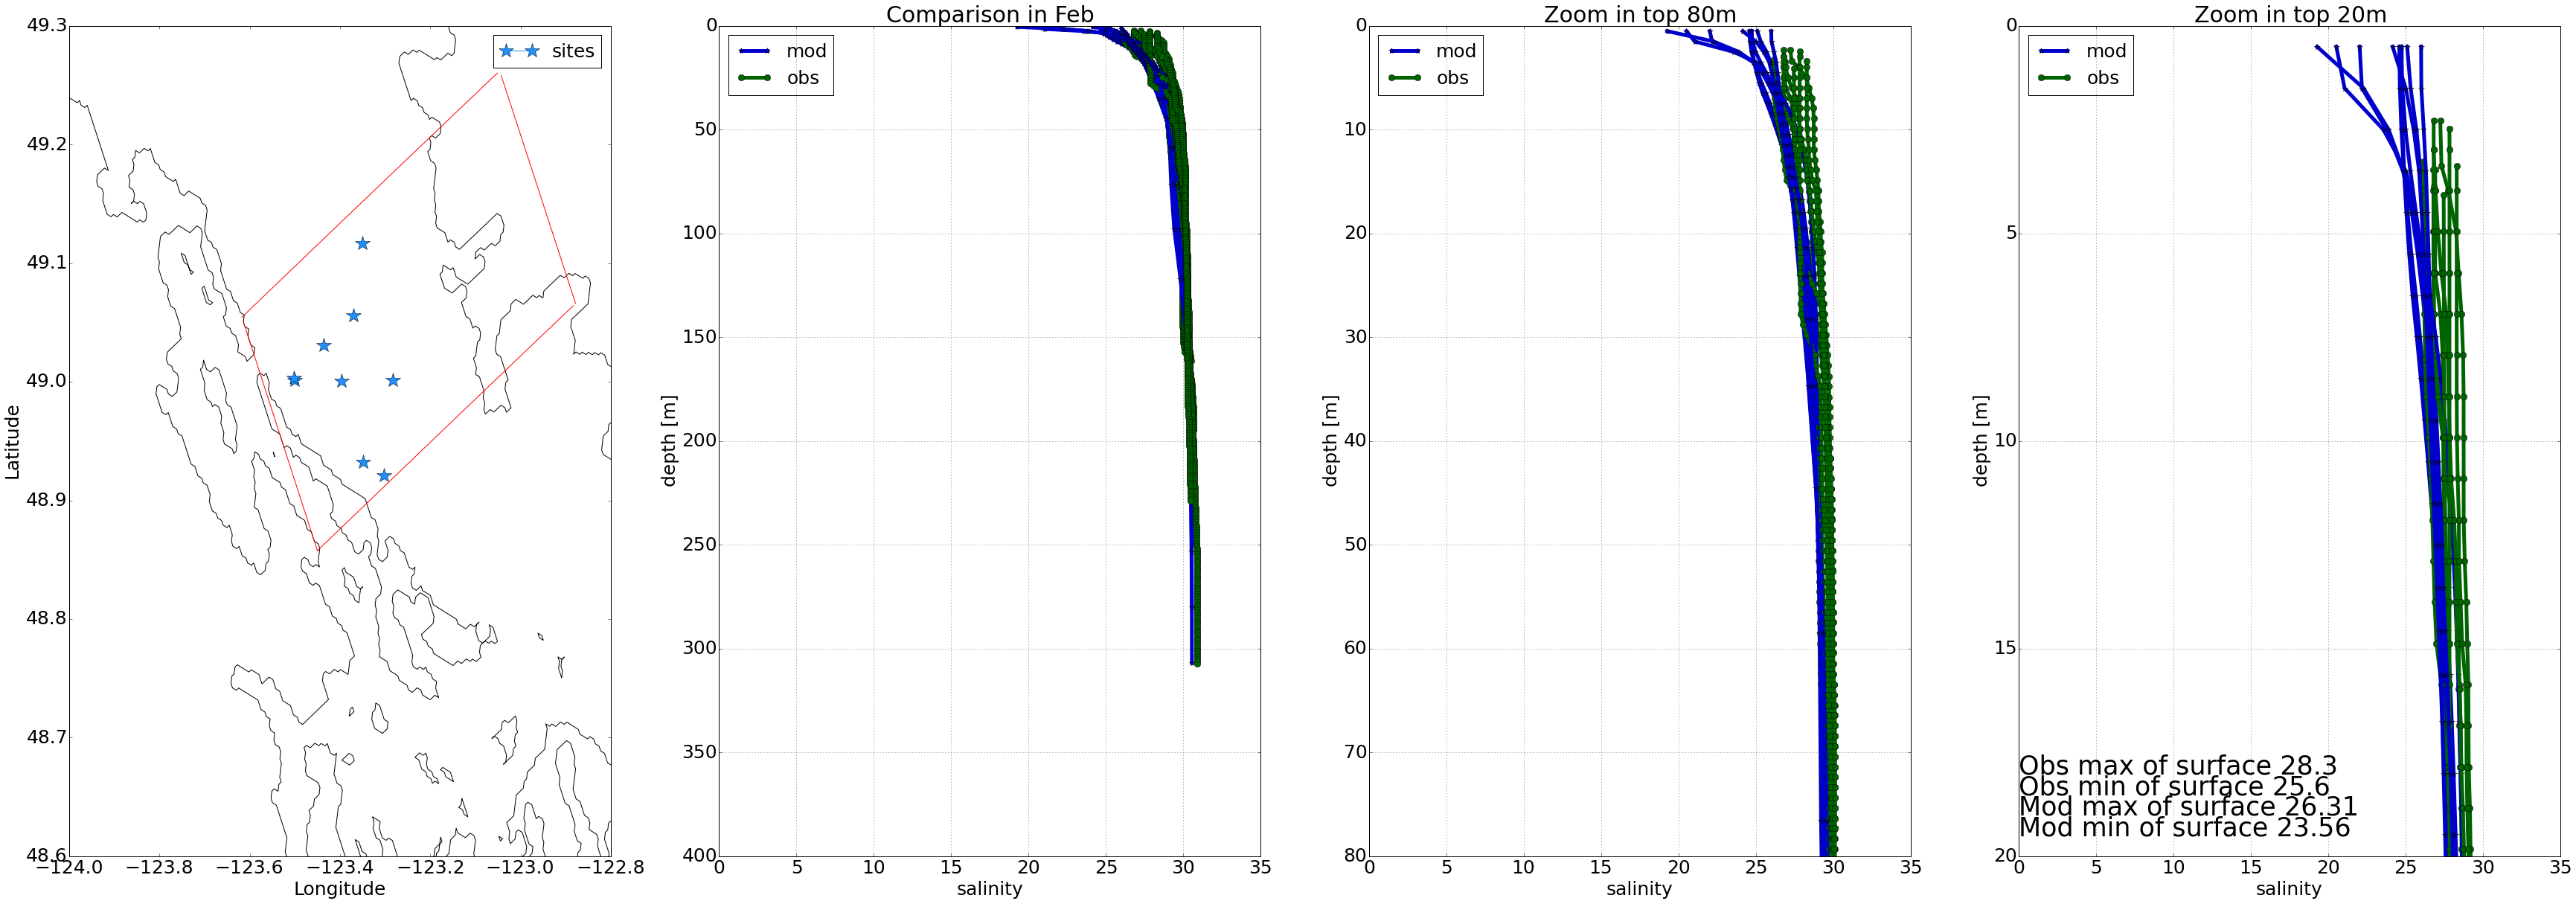

In [26]:
## Feb
fig = compare_cast_SoG_zoomin_more(sogg, 2, 3, 240, 350, 390, 440, '2')

* For year 2011, 2012, discharge in Feb is around 1000. For year 2015, mean of discharge is around 950, but reality is so high???

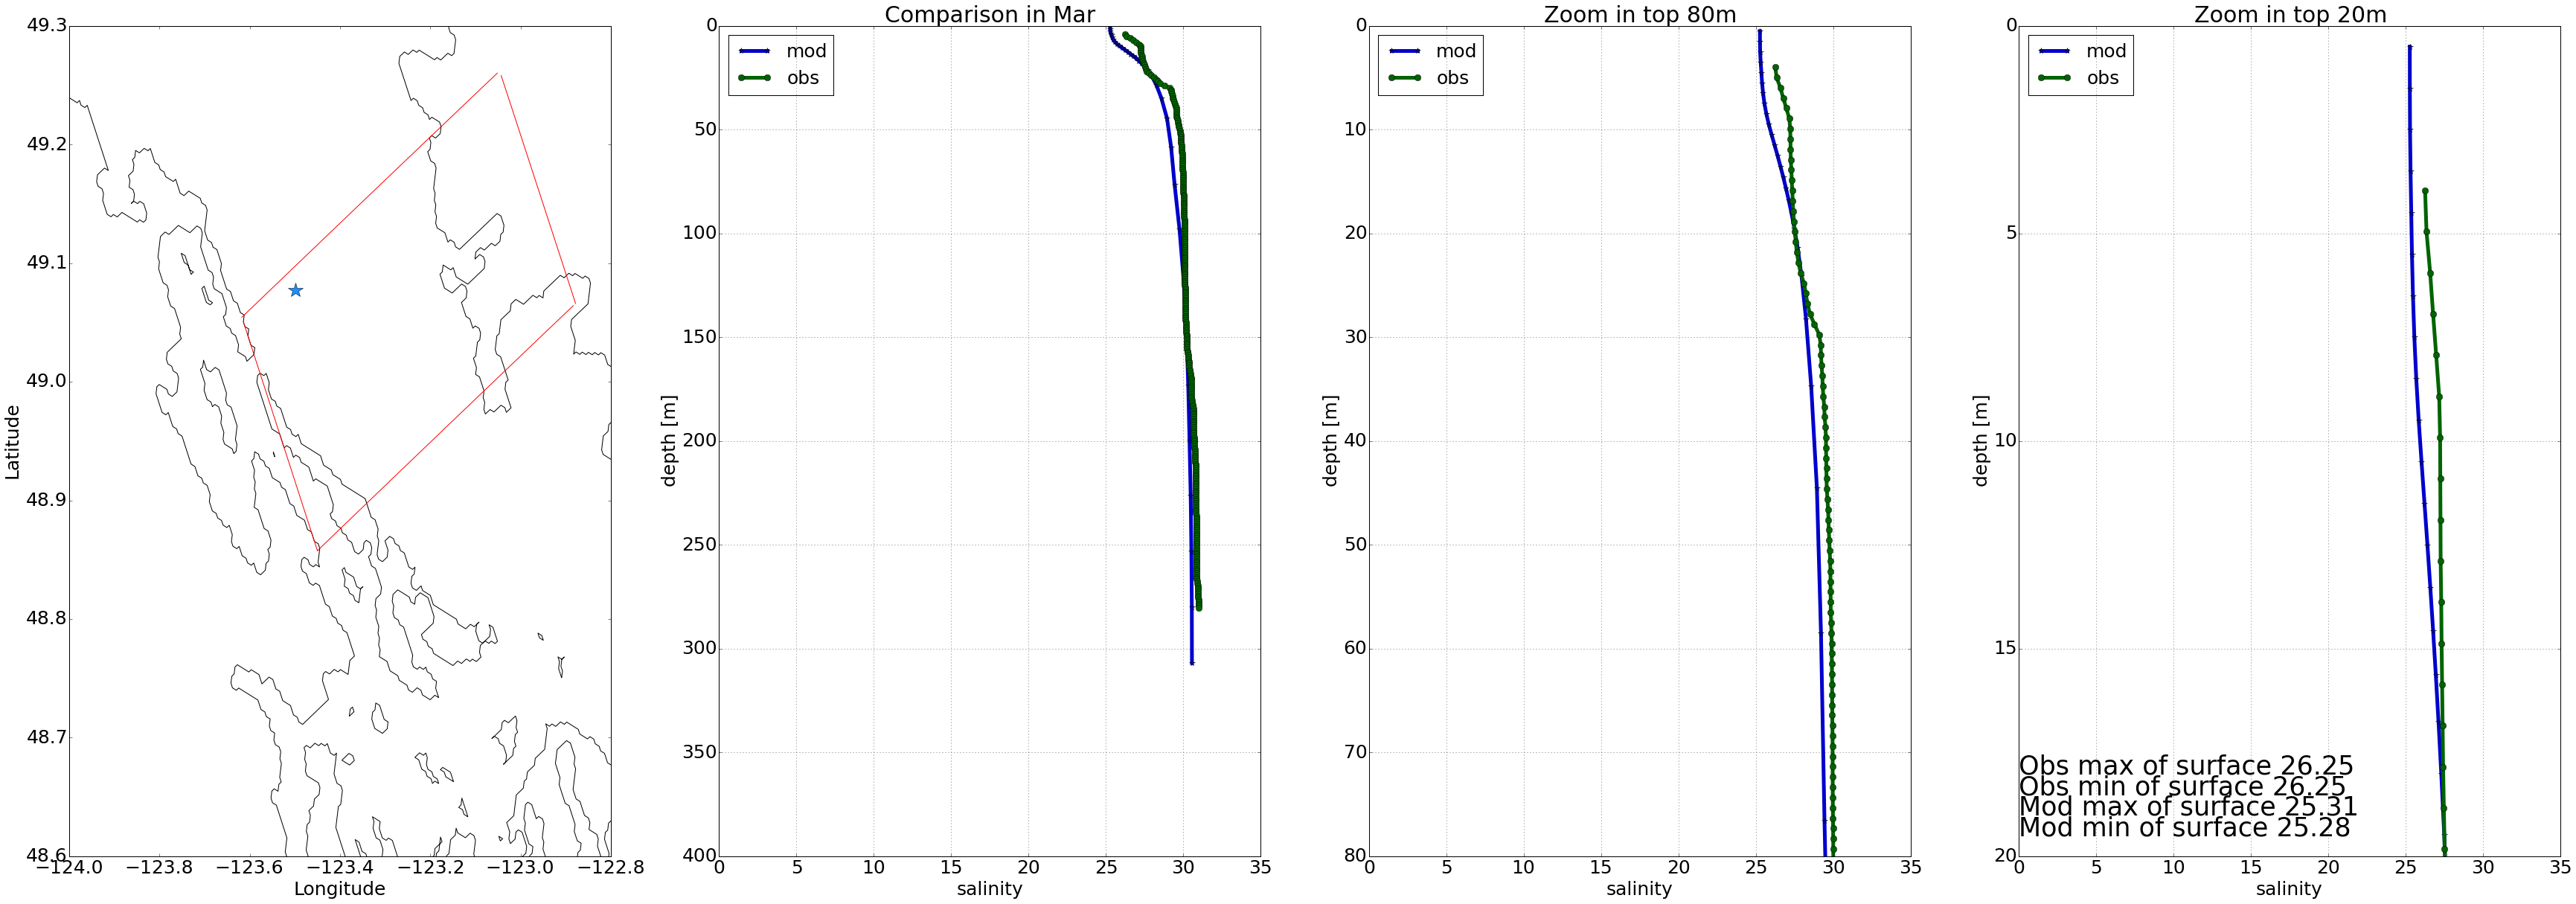

In [27]:
##March
fig = compare_cast_SoG_zoomin_more(sogg, 3, 3, 240, 350, 390, 440, '3')

* No discharge record for 2013 from Environment Canada.

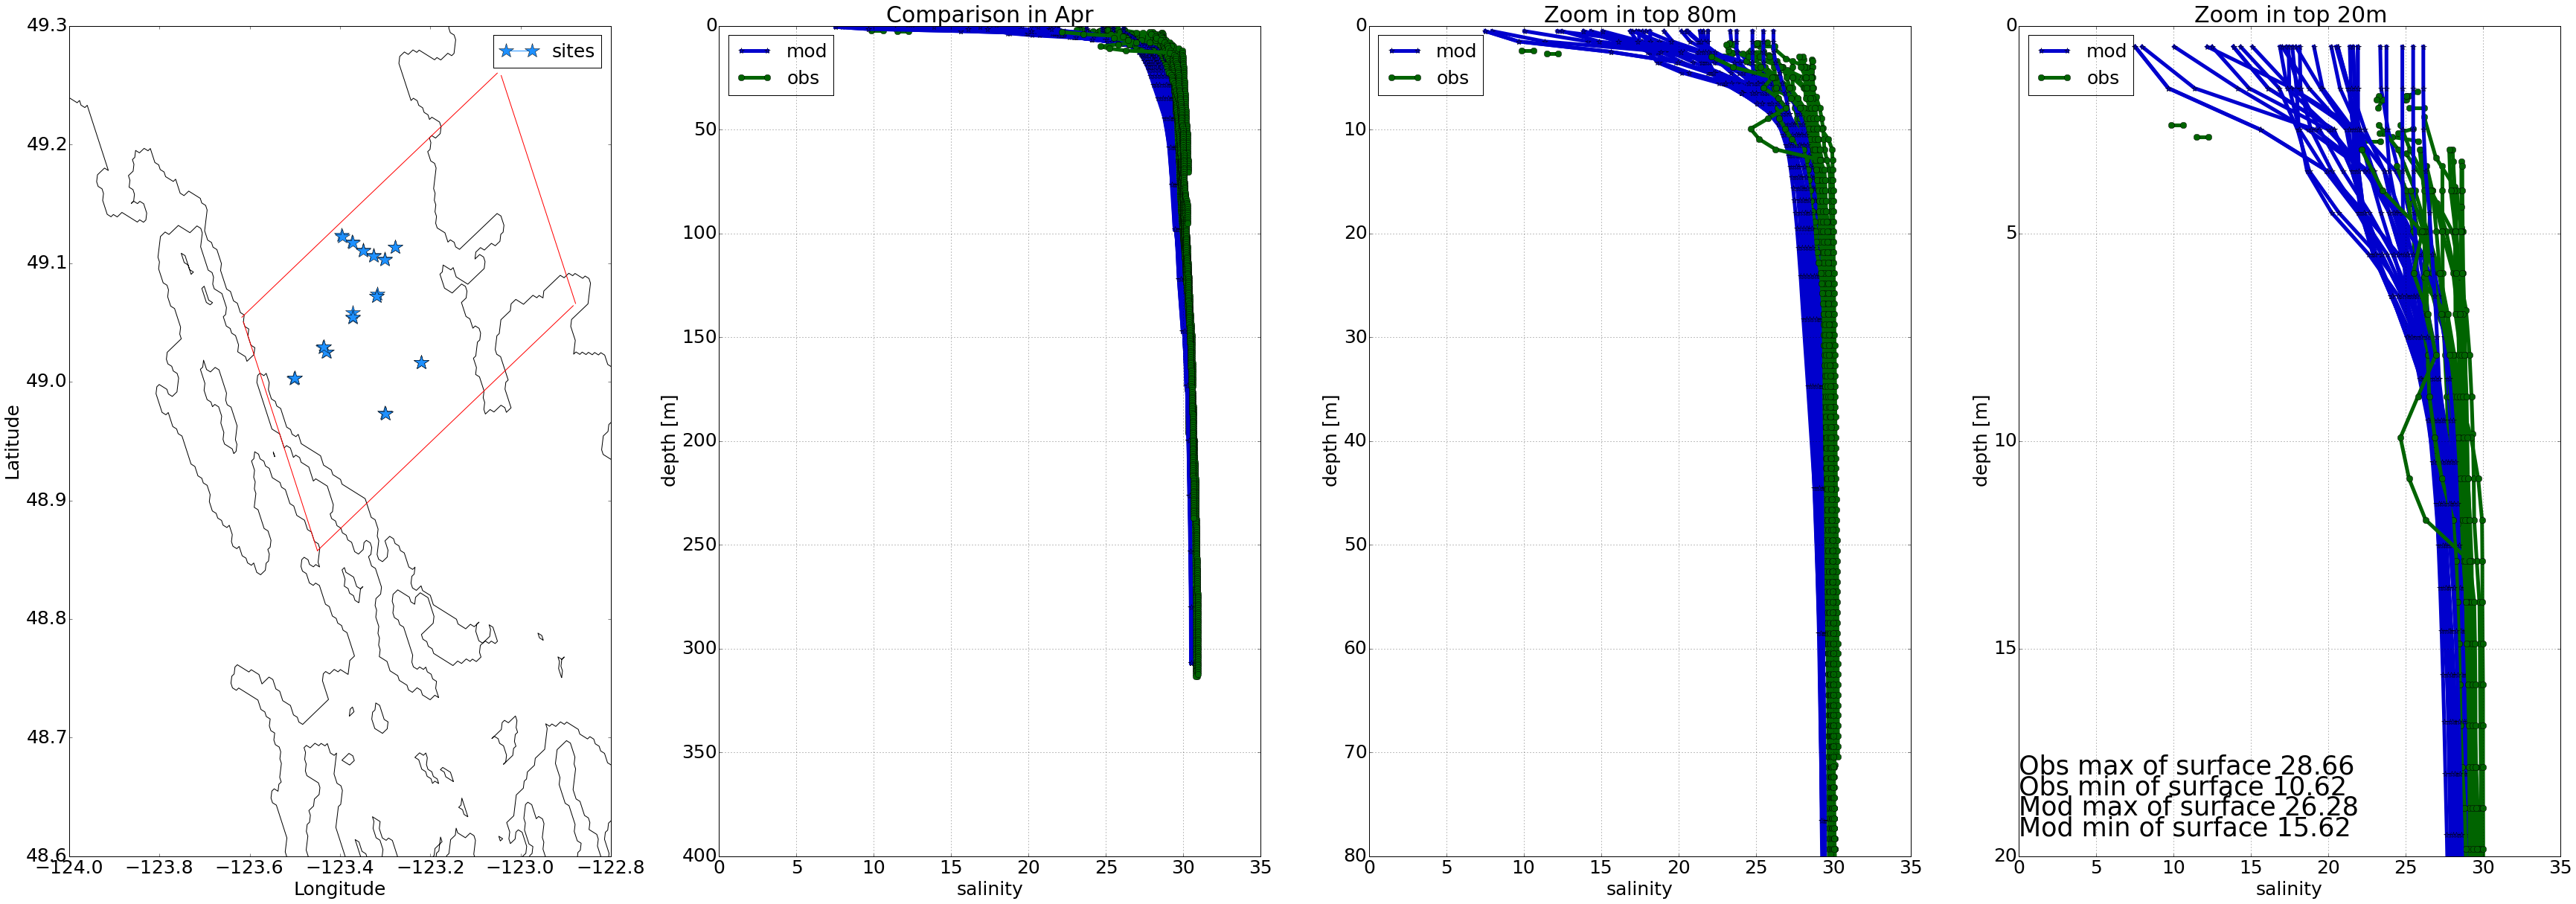

In [28]:
##April
fig = compare_cast_SoG_zoomin_more(sogg,4, 3, 240, 350, 390, 440,'4')

* For year 2011, mean discharge in Apr ranges from 1000-3000. For year 2015, the same mean. 

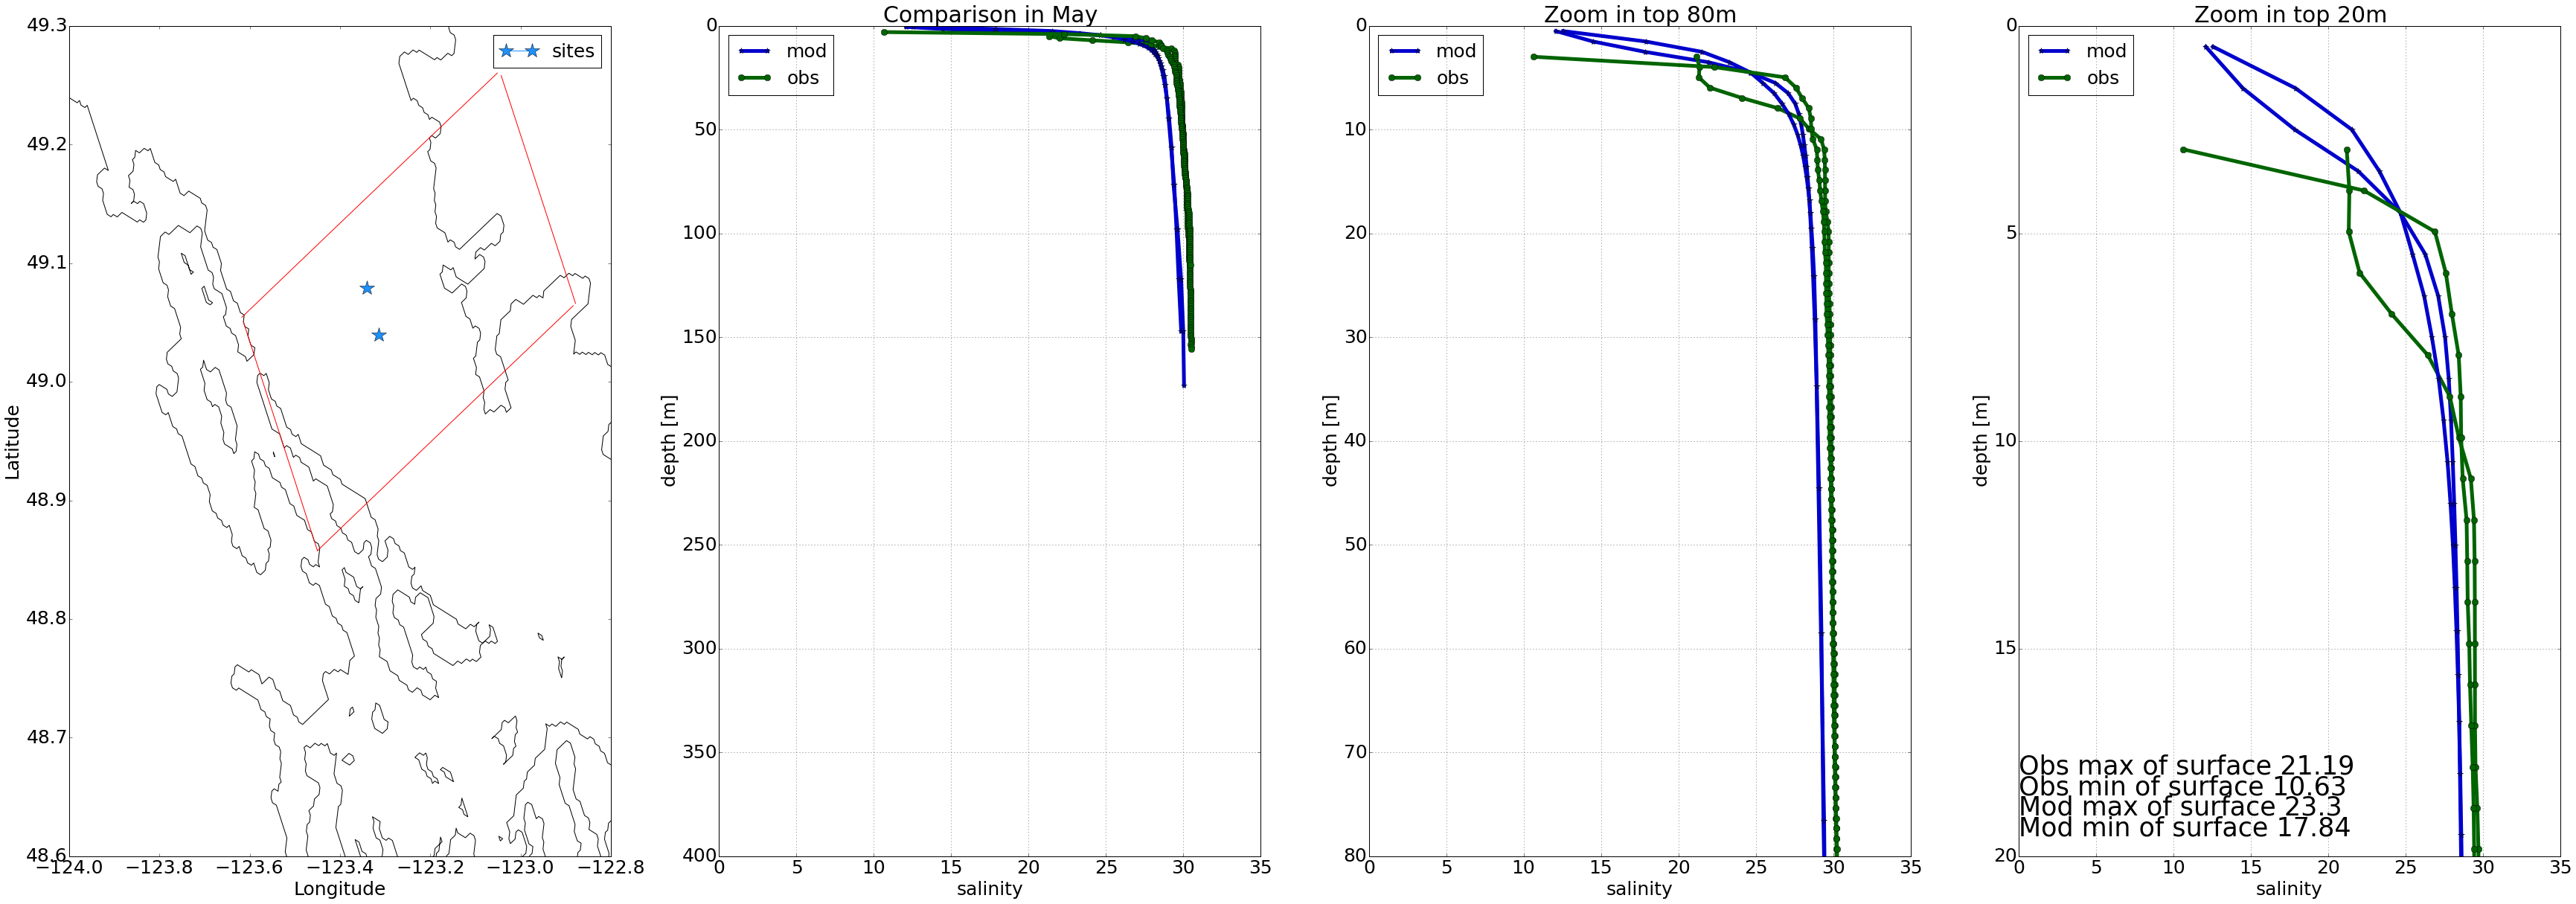

In [29]:
## May
fig = compare_cast_SoG_zoomin_more(sogg, 5, 3, 240, 350, 390, 440, '5')

* No discharge record for 2013

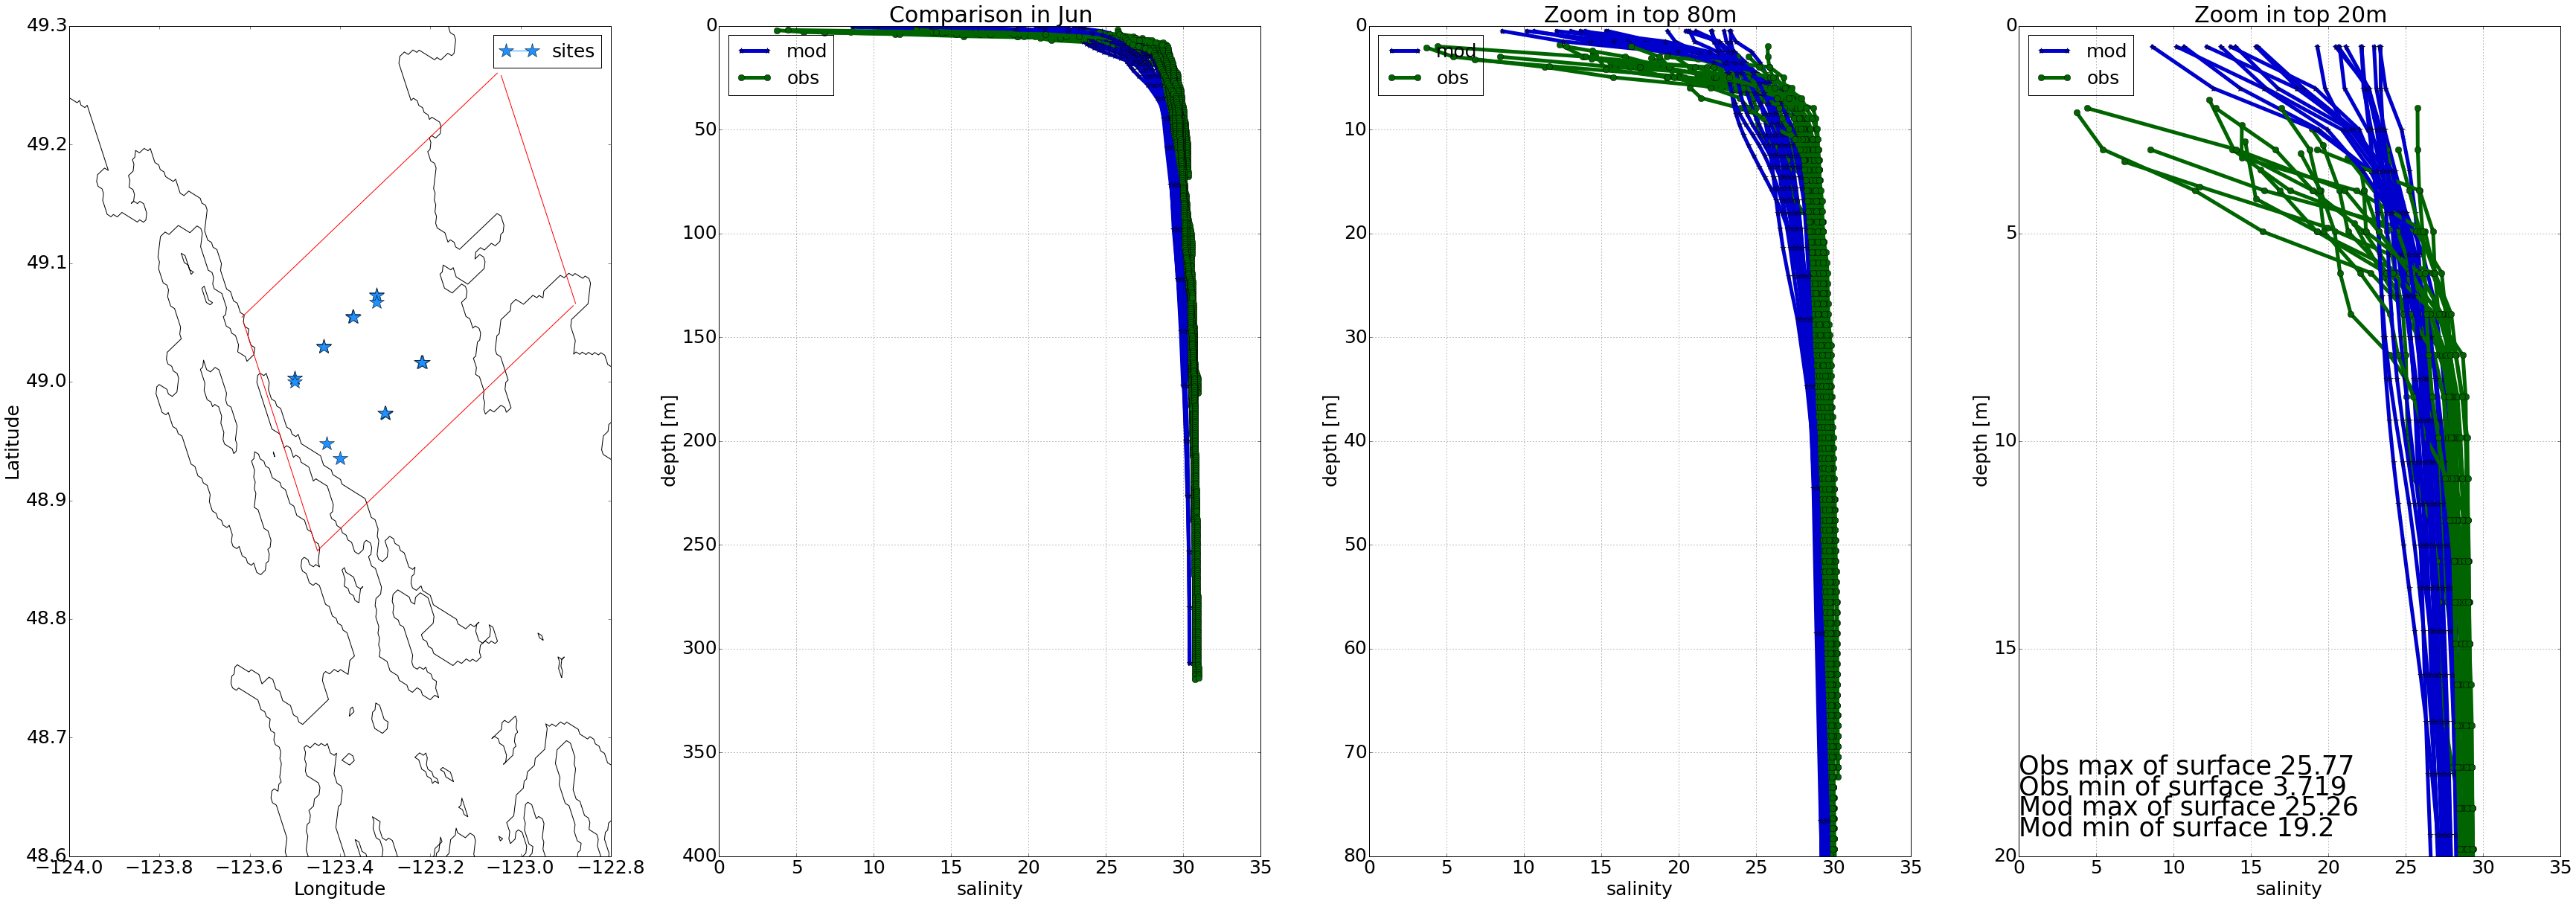

In [30]:
## June
fig = compare_cast_SoG_zoomin_more(sogg, 6, 3, 240, 350, 390, 440, '6')

* Only one profile for 2012, mean discharge in June is from 5000-7000. In 2015, mean discharge is from 6500-7000. Nearly the same...

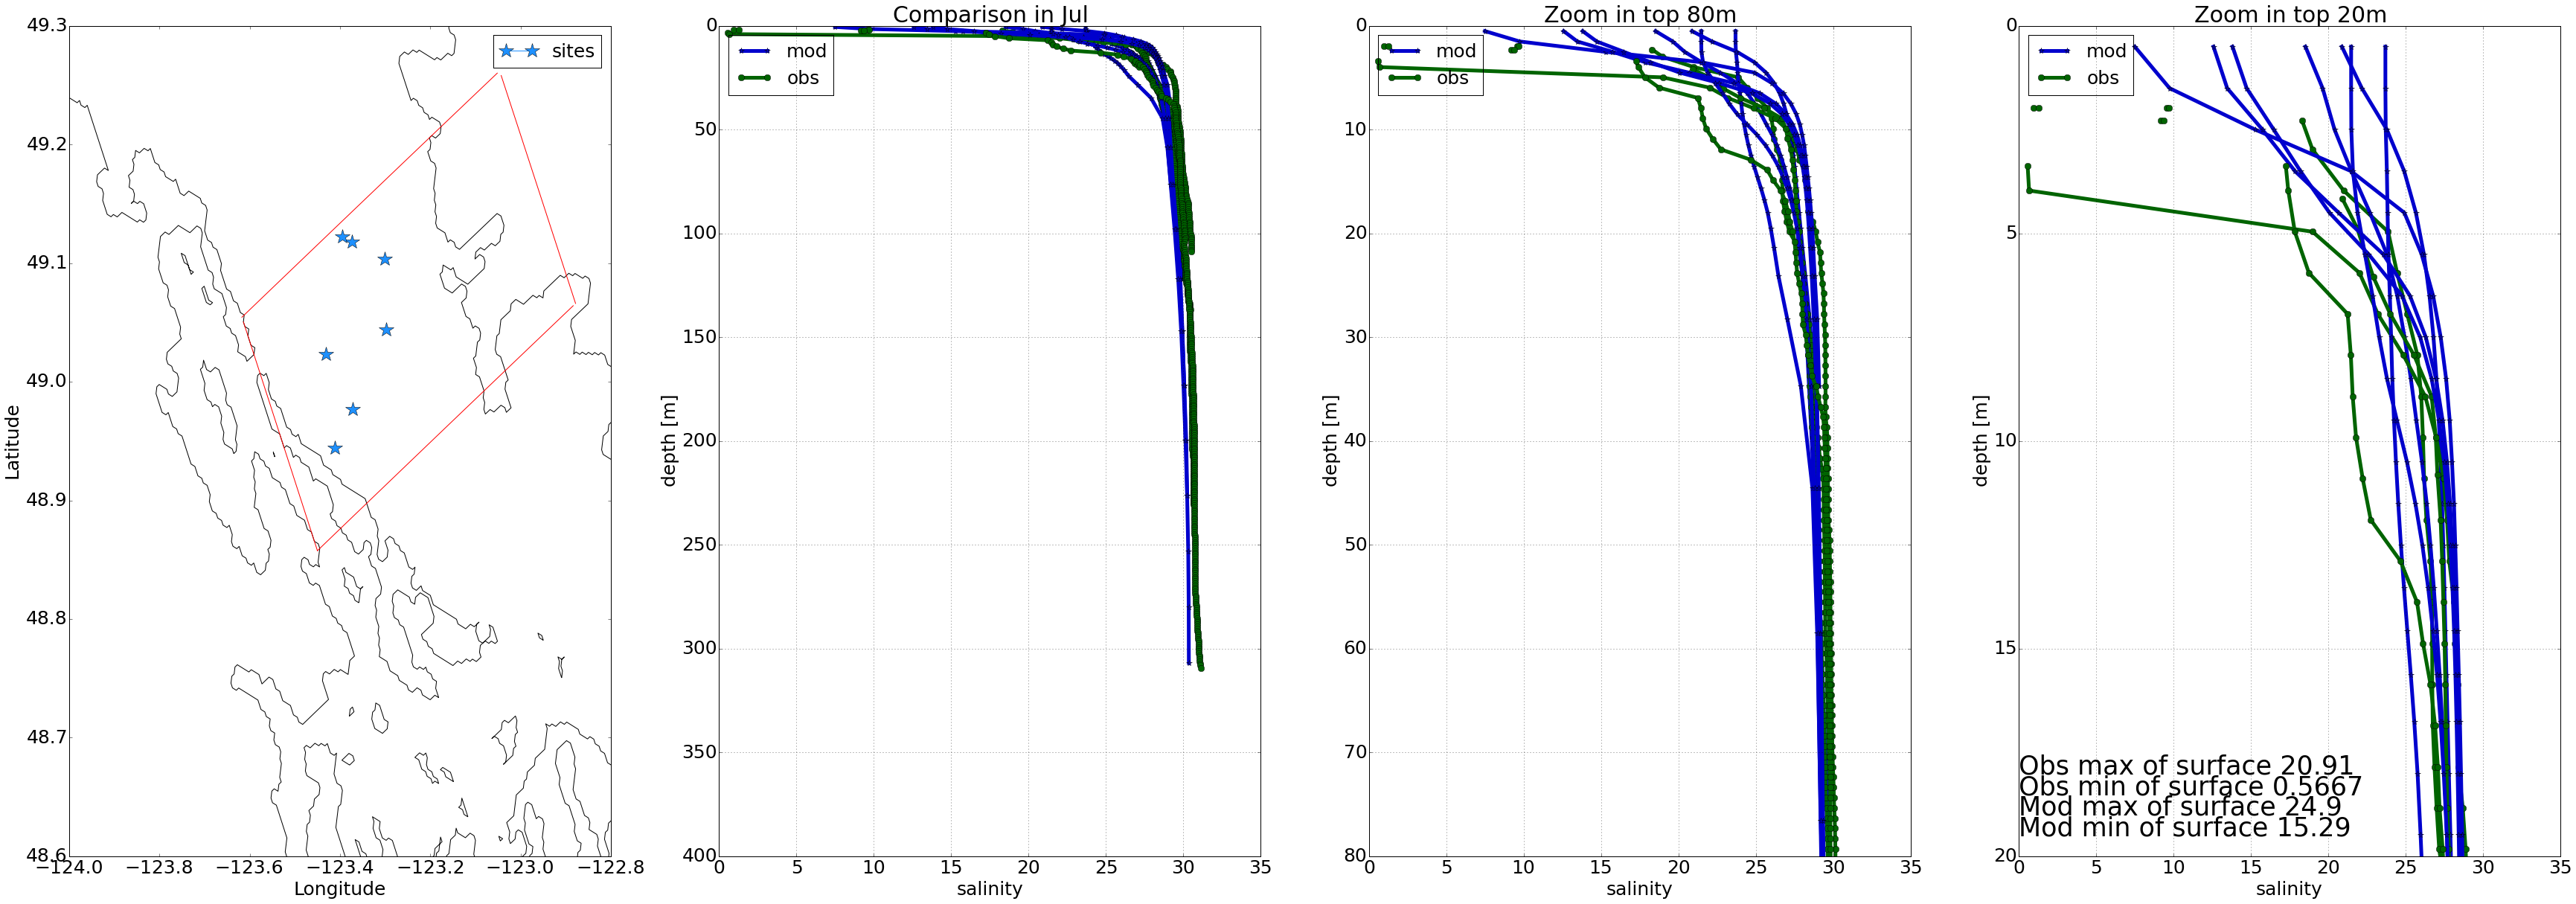

In [31]:
## July
fig = compare_cast_SoG_zoomin_more(sogg, 7, 3, 240, 350, 390, 440, '7')

* Overall, max & min surface salinity of model in non-freshet(Feb, Mar) is 1-2 psu fresher than obs with recent years data. In freshet months, model is nearly equavilent with obs or even saltier  

* I did not see 2015 year is much untypical focusing on the river discharge at Hope, or my understanding of dishcarge at Hope is somewhat incomprehensive, need to consult Mark with some points! 

# Read Mark's Fraser discharge in year 2013 & 2014

In [33]:
from scipy import interpolate as interp
from datetime import datetime, timedelta
import scipy.io as sio

In [34]:
fraser = sio.loadmat('/ocean/jieliu/research/meopar/river-discharge/fraser_flow_hope.mat') 

In [35]:
flow = fraser['flow']
time = fraser['ftime']
cc =np.float(time[0,1])
#flow[0,1]

In [36]:
def read_fraser_month(flow, time, Month):
    """This function was made to extract 2014 or
        2013 fraser discharge in different month
        return time and discharge of that month
        separately"""
    flow_m = np.zeros([time.shape[1], 1])
    time_m = np.zeros([time.shape[1], 1])
    for i in np.arange(0, time.shape[1]):
        matlab_datenum = np.float(time[0,i])
        python_datetime = datetime.fromordinal(int(matlab_datenum))\
        + timedelta(days=matlab_datenum%1) - timedelta(days = 366)
        if(python_datetime.year == 2014) & (python_datetime.month == Month):
            flow_m[i] = flow[0,i]
            time_m[i] = time[0,i] 
    mask=flow_m[:,0]!=0
    flow_mm = flow_m[mask]
    time_mm = time_m[mask]
    p_d = []
    for j in time_mm:
        m_d = np.float(j[0])
        p_d.append(datetime.fromordinal(int(m_d))\
        + timedelta(days=m_d%1) - timedelta(days = 366))
    return time_mm, p_d, flow_mm

In [37]:
t, p_d, f = read_fraser_month(flow, time, 11)

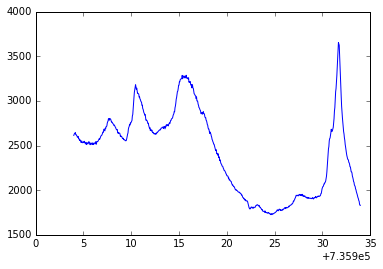

In [38]:
plt.plot(t, f)